## Challenge 2

Demonstrate how one might devise an observational campaign to capture this tipping point.

The aim of this challenge is for you to use the datset provided to design an observational campaign based on fixed "mooring" sites. 
Select a small number of candidate locations, extract and analyse the local time series and/or depth profiles at each site, and use this to decide where you would place moorings, for how long, and what frequency you might want them at in order to identify a tipping point. 
___

This time you are going to use a 3D datatset. Use what you have learnt in Challenge 1 to define the path where the data is stored, then acess it and inspect it.

In [22]:
# Your dataset path and  filename are /gws/pw/j07/workshop/ARIA_src_data/ and VERIFY_eORCA025_MED_UKESM_3D_19900101_20000101_grid_T.nc 
# Hint: remeber using xr.open_dataset 

#print('write your code here')
import xarray as xr 

path = "/gws/pw/j07/workshop/ARIA_src_data/"
t_path3d = path + "VERIFY_eORCA025_MED_UKESM_3D_19900101_20000101_grid_T.nc"

ds = xr.open_dataset(t_path3d)

ds

<xarray.Dataset> Size: 12GB
Dimensions:               (time_counter: 120, deptht: 75, axis_nbounds: 2,
                           y: 400, x: 400)
Coordinates:
  * deptht                (deptht) float32 300B 0.5058 1.556 ... 5.902e+03
    nav_lat               (y, x) float32 640kB ...
    nav_lon               (y, x) float32 640kB ...
    time_centered         (time_counter) object 960B ...
  * time_counter          (time_counter) object 960B 1990-01-16 00:00:00 ... ...
Dimensions without coordinates: axis_nbounds, y, x
Data variables:
    deptht_bounds         (time_counter, deptht, axis_nbounds) float32 72kB ...
    so                    (time_counter, deptht, y, x) float32 6GB ...
    thetao                (time_counter, deptht, y, x) float32 6GB ...
    time_centered_bounds  (time_counter, axis_nbounds) object 2kB ...
    time_counter_bounds   (time_counter, axis_nbounds) object 2kB ...
Attributes: (12/14)
    name:         MEANS_OUT/eORCA025_MED_UKESM_1m_19900101_19921230_grid_T
    description:  ocean T grid variables
    title:        ocean T grid variables
    Conventions:  CF-1.6
    timeStamp:    2021-Nov-06 06:11:48 GMT
    uuid:         89941c43-5b52-4f24-8d21-fff8d0897b4c
    ...           ...
    jbegin:       0
    nj:           76
    file_name:    eORCA025_MED_UKESM_1m_19900101_19921230_grid_T_199001-19900...
    TimeStamp:    06/11/2021 18:12:14 +0000
    history:      Mon Nov 24 11:46:12 2025: ncks -d deptht,0,74 -d x,801,1200...
    NCO:          netCDF Operators version 5.3.3 (Homepage = http://nco.sf.ne...

You will notice that your dataset now has three dimensions: latitude, longitude, and depth.     
By selecting a specific depth level, you can plot that layer as a two-dimensional field, similarly to what you have done in Challenge1:

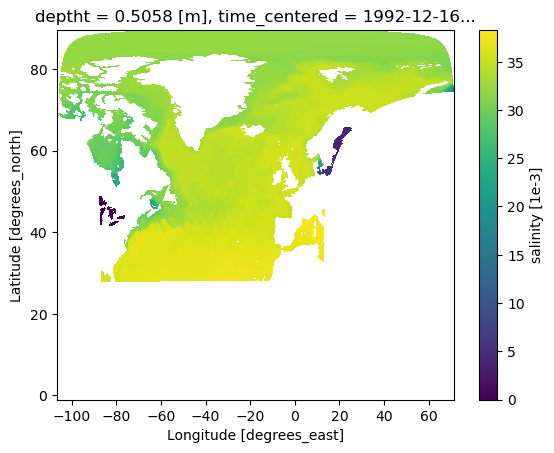

In [38]:
# Select a date and a depth level
# Use the sel() function to select the data based on values of a specific dimension.
# Use the isel() function to select the data based on the index position. 

# This is an example for december 1992:
Salinity = ds.so.sel(time_counter="1992-12").isel(deptht=0) 
# alternatives: 
# Salinity = ds.so.sel(time_counter="1992-12").sel(deptht=0, method="nearest")
# Salinity = ds.so.isel(time_counter=35).isel(deptht=0)

# mask the data to cover the land regions using the domain file. 
dom_cfg = xr.open_dataset(path + "verify.domcfg.nc") # open the domain
Salinity = Salinity.where(dom_cfg.top_level == 1) # apply maks 

# Finally plot your salinity. 
Salinity.plot(x="nav_lon", y="nav_lat")


Now select one mooring location. 
This will be one point in space (lat/lon), but all depth available at that location. Start with only one point in time.     

There are different options for you here. Note that :    

picking a random index for your latitude and longitude will work, but it might be difficult to picture where your point is.      
eg. if you want the point of index (50,100) this should work: salinity_profile = ds.so.sel(time_counter="1992-12").isel(y=100, x=50) 

The sel() function will not work directly with nav_lat/nav_lon (they are 2D auxiliary coords, not index coordinates)      
Therefore, this will NOT work: salinity_profile = ds.so.sel(time_counter="1992-12").sel(nav_lat=70, nav_lon=10, method="nearest")

In [64]:
# The most recomendable way to pick a point is to first select a latitutde and longitude you want to investigate, for eg. latitude = 70N, longitude= 10E: 
target_lat = 70
target_lon = 10

# Then find the closest model point to these coordinates 
dist = ((ds.nav_lat - target_lat)**2 + (ds.nav_lon - target_lon)**2)**0.5

# To be continued 

Plot the data you have just selected. This should be one depth profile.     
Can you see the tipping point?

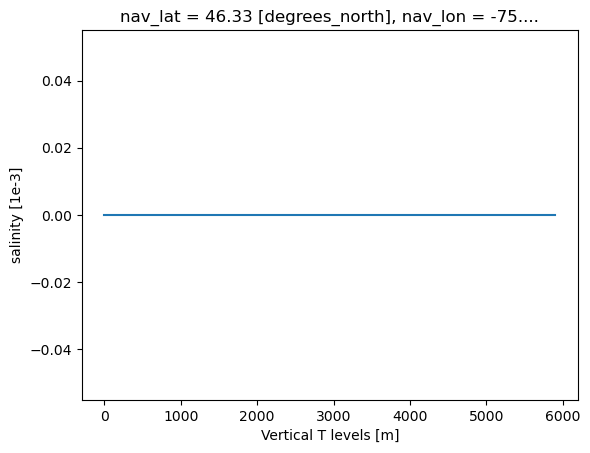

In [61]:
# Plotting depth profile code
salinity_profile.plot()

Now at that same location pick one depth and plot the entire time series for your variable.     
Can you see the tipping point now? 

In [22]:
# Code to extract time series at one point, random depth
# + 
# code for plotting the time series. 

To properly investigate your variable at a mooring site, you may want to examine its evolution over time at all depths simultaneously.    
This is commonly done with hovmoller plots. 

First let's select the data at one point, for all depths and for the entire timeseries. Think of what you expect the size of your subsample to be.

In [23]:
# give them code to select 1 pt depths x time.

Now plot you data. 

Can you see the tipping point?    
Is it easier to spot that in the previous examples?

In [24]:
# write code for Hovmoller plot

Now select a few different points over the model domain and have a look a them.
Can you find examples of point where the tipping point is clearer and some where the tipping point is harder to see?    
Select a few point that you think are a good mooring site. 

In [26]:
print('write your code here')

write your code here
